In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import pickle

In [4]:
import vdetect

In [5]:
test_images = [mpimg.imread(f) for f in glob('test_images/*.jpg')]

main_region = vdetect.define_main_region_custom()
mr_x0, mr_y0, mr_x1, mr_y1 = main_region

In [6]:
def load_pickle(fname):
    with open(fname, 'rb') as f:
        return pickle.load(f)

In [7]:
TIMESTAMP = '2018-04-14_204730'

clf_files = glob('serialize/{0}/clf*.p'.format(TIMESTAMP))
scaler_file = 'serialize/{0}/scaler_{0}.p'.format(TIMESTAMP)

scaler = load_pickle(scaler_file)
classifiers = [load_pickle(fname) for fname in clf_files]

In [8]:
classifiers

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False)]

(0, 138, 1280, 650)


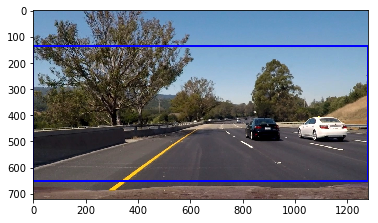

In [9]:
im = test_images[0]

plt.imshow(
    vdetect.draw_boxes(
        im,
        [main_region]
    )
)

print(main_region)

(64, 64, 3)

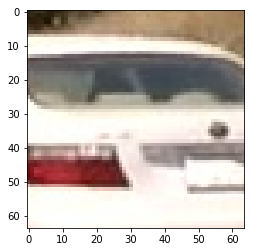

In [10]:
car_reg = vdetect.window_region(im, [1100,400,1100+63,400+63])
plt.imshow(car_reg)
car_reg.shape

In [11]:
extract = vdetect.create_feature_extractor(scaler)

car_reg_features = extract(car_reg)

pred = classifiers[0].predict(car_reg_features)
pred

array([ 1.])

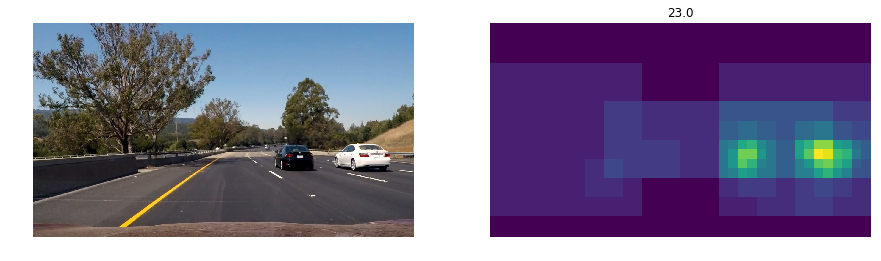

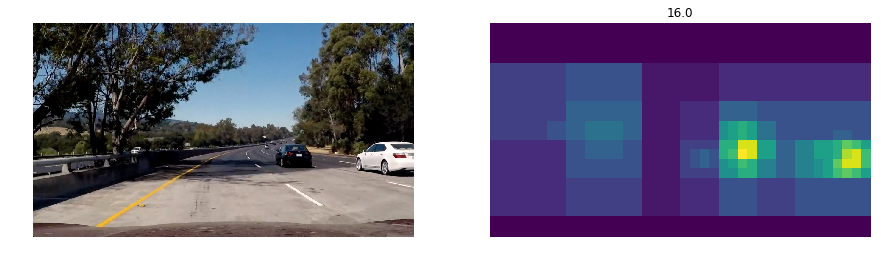

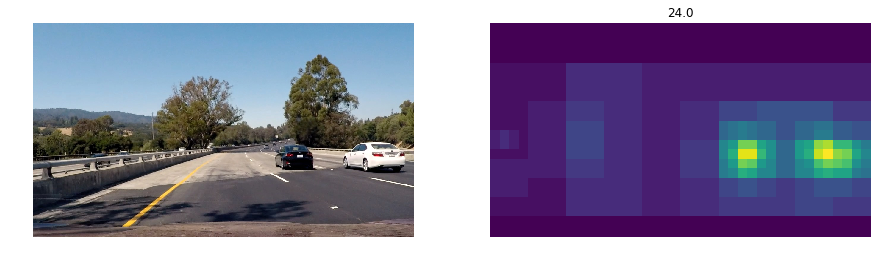

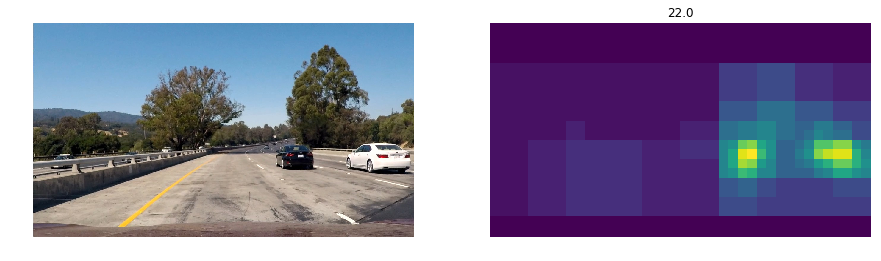

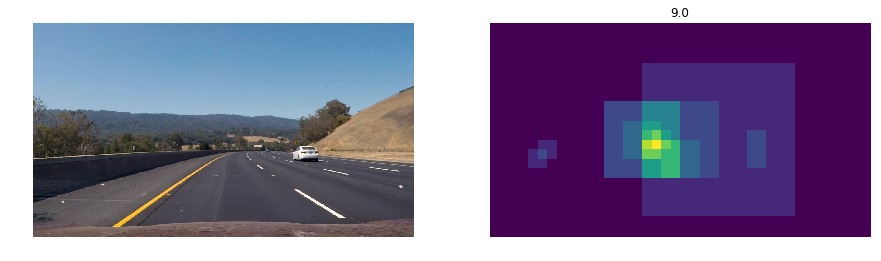

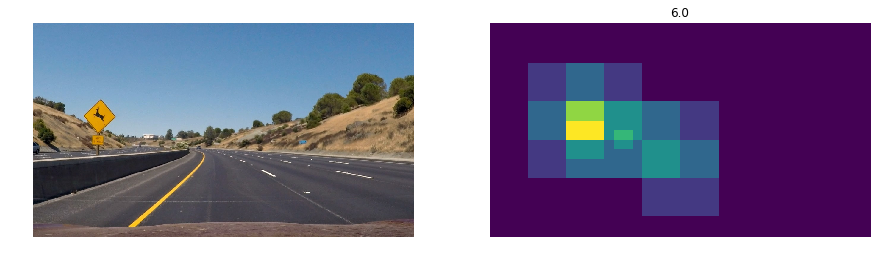

In [12]:

for im in test_images:
    
    swres = vdetect.sliding_window(im, extract, classifiers)

    plt.figure(figsize=(15, 20))
    
    plt.subplot(1, 2, 1)
    plt.imshow(im)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(swres)
    plt.axis('off')
    plt.title(np.max(swres))
    